In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:\\Users\\Nishita Verma\\BigMart_train.csv')
test = pd.read_csv('C:\\Users\\Nishita Verma\\BigMart_test.csv')

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
(train.isnull().sum()/train.shape[0]) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

* __We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.__

In [6]:
train.dtypes # have many categorical features

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [8]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [9]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

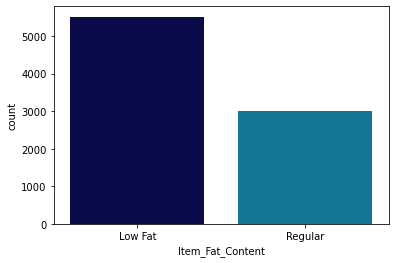

In [12]:
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

__The Items bought are more of Low Fat.__

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

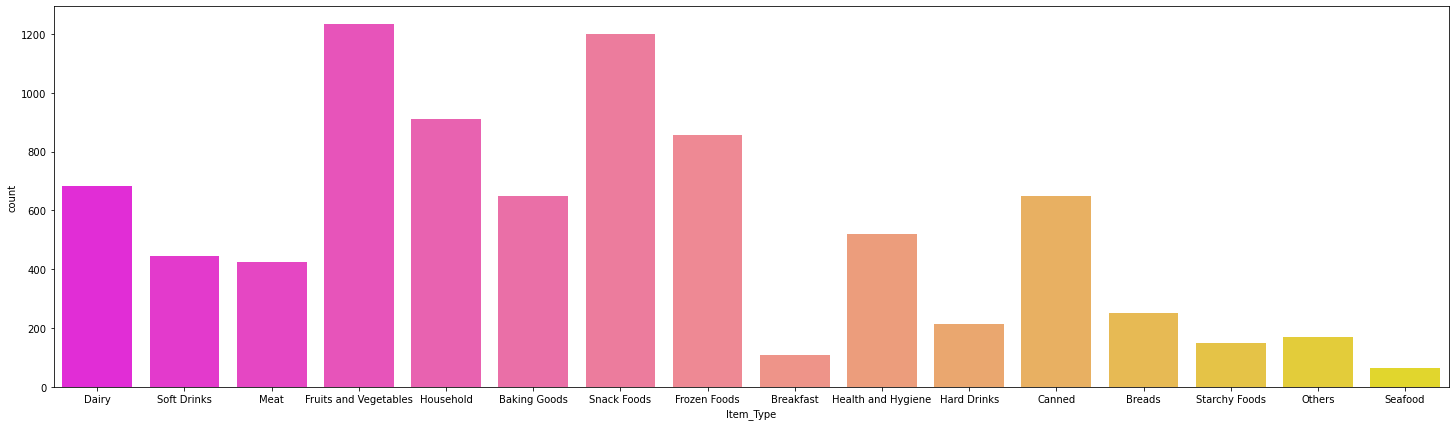

In [13]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train,palette='spring')

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

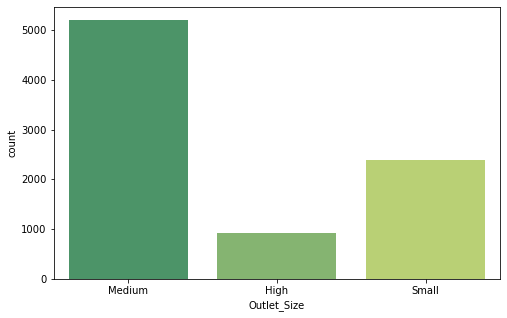

In [14]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='summer')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

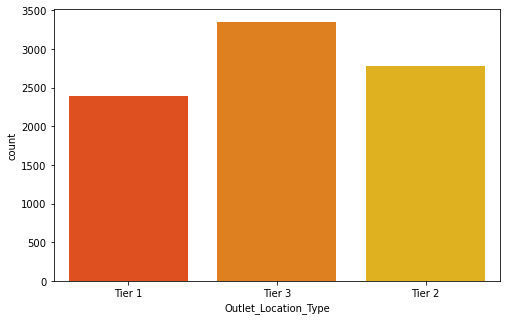

In [15]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

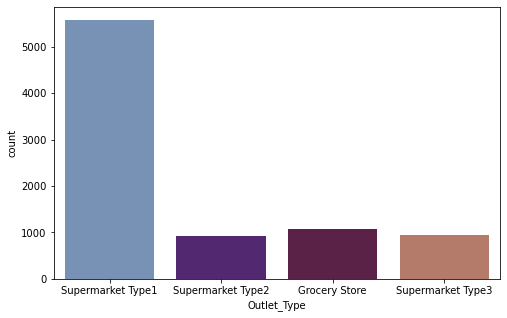

In [16]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

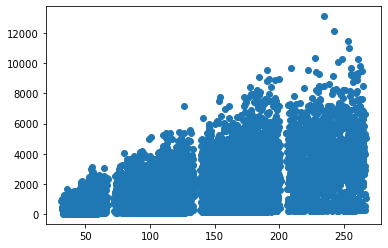

In [17]:
plt.scatter(data = train, x ='Item_MRP', y = 'Item_Outlet_Sales')

<AxesSubplot:>

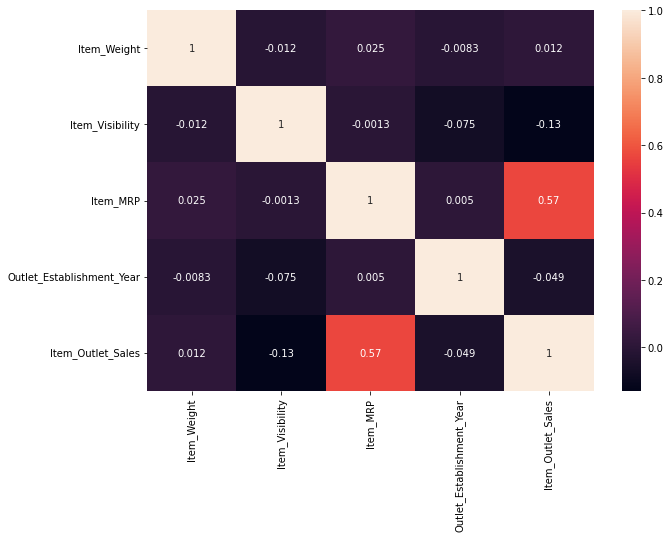

In [18]:
plt.figure(figsize= (10,7))
sns.heatmap(data = train.corr(), annot = True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

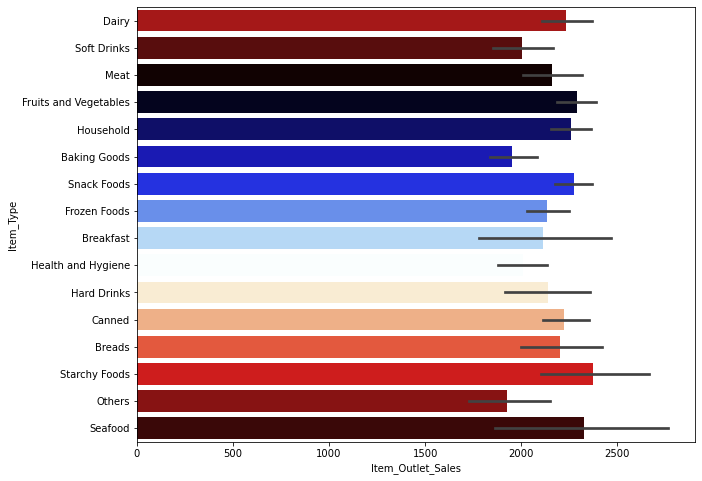

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

## Pre-Processing categorical features

In [20]:
le = LabelEncoder()
cat_col_train = train.select_dtypes(include='object').columns
for i in cat_col_train:
    train[i] = le.fit_transform(train[i])

cat_col_test = test.select_dtypes(include='object').columns
for i in cat_col_test:
    test[i] = le.fit_transform(test[i])

In [21]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [22]:
X_train = train.drop(['Item_Outlet_Sales'], axis = 1)
y_train = train['Item_Outlet_Sales']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2, random_state=22)

## Building ML Models

In [24]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
algos = [LinearRegression(),  Ridge(), Lasso(),DecisionTreeRegressor(), GradientBoostingRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','Decision Tree Regressor', 'GradientBoostingRegressor']

rmse_list = []

In [26]:
for i in algos:
    model = i
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [27]:
evaluation = pd.DataFrame({'Model': names ,'RMSE':rmse_list})
evaluation.sort_values('RMSE')

,Model,RMSE
4,GradientBoostingRegressor,1151.072794
2,Lasso Regression,1245.732959
1,Ridge Regression,1246.061549
0,Linear Regression,1246.171773
3,Decision Tree Regressor,1603.028782


In [28]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [29]:
model.predict([[1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0]])

array([593.26088066])

In [31]:
model.predict(test)

array([1676.29101972, 1456.47834994,  593.26088066, ..., 1867.14421322,
       3591.80057018, 1250.03477733])